# Discente: **Jean Carlos de Carvalho Costa**

# Experimento: Cross-Entropy Loss com Softmax

Este experimento demonstra o uso da função Softmax e a evolução da perda de entropia cruzada ao longo de várias iterações. O objetivo é minimizar a entropia por meio de perturbações gaussianas nos logits iniciais.

Vamos explorar o seguinte processo:

1. Definição das funções principais: Softmax e Cross-Entropy Loss.
2. Inicialização de logits aleatórios e labels one-hot.
3. Cálculo inicial da perda e aplicação do Softmax.
4. Aplicação iterativa de perturbações gaussianas para minimizar a entropia.
5. Visualização da evolução da entropia.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Configurações iniciais
np.random.seed()  # Define a semente baseada no relógio do sistema
def softmax(logits):
    exp_logits = np.exp(logits - np.max(logits))
    return exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

# Função para calcular a perda de entropia cruzada
def cross_entropy_loss(probs, labels):
    return -np.sum(labels * np.log(probs + 1e-12), axis=1).mean()

# Geração de pertubações gaussianas
def generate_perturbations(original_logits, std_dev):
    return [
        np.random.normal(loc=original_logits, scale=std_dev)
        for _ in range(4)
    ]

In [3]:
def initialize():
    num_samples = 3
    num_classes = 3
    logits = np.random.uniform(0.1, 3.0, (num_samples, num_classes))
    labels = np.eye(num_classes)  # Rótulos one-hot encoded
    return logits, labels

logits, labels = initialize()
print("Logits iniciais:")
print(logits)
print("\nLabels (one-hot encoded):")
print(labels)

Logits iniciais:
[[0.90213744 2.96575669 0.28846282]
 [2.44711981 0.22648899 1.72184405]
 [0.54128713 0.48307877 0.34056144]]

Labels (one-hot encoded):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


## Visualização Inicial

Aqui estão os logits gerados aleatoriamente e os rótulos one-hot. Agora, aplicaremos o Softmax para calcular as probabilidades.


In [4]:
# Aplica Softmax e calcula a perda inicial
probs = softmax(logits)
initial_loss = cross_entropy_loss(probs, labels)

print("Probabilidades iniciais:")
print(probs)
print("\nPerda inicial (Cross-Entropy):")
print(initial_loss)


Probabilidades iniciais:
[[0.10620474 0.83630048 0.05749478]
 [0.62785216 0.06814746 0.30400038]
 [0.36211021 0.34163409 0.2962557 ]]

Perda inicial (Cross-Entropy):
2.0483334266092554


## Perturbações Gaussianas e Processo Iterativo

Em cada iteração, geramos novas versões dos logits com perturbações gaussianas. A menor entropia entre os conjuntos gerados será mantida para a próxima iteração.

Abaixo, realizaremos uma única iteração como exemplo.


In [5]:
# Gera perturbações e calcula perdas
std_dev = 0.5
perturbations = generate_perturbations(logits, std_dev)

all_logit_sets = [logits] + perturbations
all_losses = []

for perturbation_logits in all_logit_sets:
    probs = softmax(perturbation_logits)
    loss = cross_entropy_loss(probs, labels)
    all_losses.append(loss)

# Seleciona o conjunto com menor perda
sorted_indices = np.argsort(all_losses)
logits = all_logit_sets[sorted_indices[0]]

print("Menor perda após a iteração:")
print(all_losses[sorted_indices[0]])


Menor perda após a iteração:
1.9267196873191965


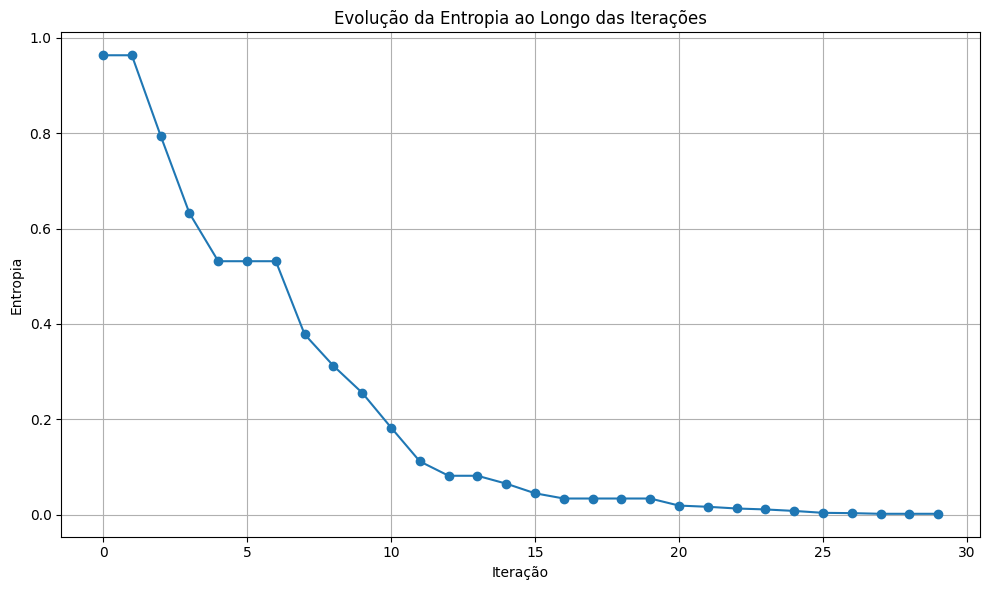

In [6]:
num_iterations = 30
entropy_evolution = []

logits, labels = initialize()

for iteration in range(num_iterations):
    probs_original = softmax(logits)
    loss_original = cross_entropy_loss(probs_original, labels)
    perturbations = generate_perturbations(logits, std_dev)

    all_logit_sets = [logits] + perturbations
    all_losses = []

    for perturbation_logits in all_logit_sets:
        probs = softmax(perturbation_logits)
        loss = cross_entropy_loss(probs, labels)
        all_losses.append(loss)

    sorted_indices = np.argsort(all_losses)
    logits = all_logit_sets[sorted_indices[0]]
    entropy_evolution.append(all_losses[sorted_indices[0]])

# Visualiza a evolução da entropia
plt.figure(figsize=(10, 6))
plt.plot(entropy_evolution, marker='o')
plt.title('Evolução da Entropia ao Longo das Iterações')
plt.xlabel('Iteração')
plt.ylabel('Entropia')
plt.tight_layout()
plt.grid()
plt.show()
